<a href="https://colab.research.google.com/github/yevintheenura01/DL_Assignment/blob/Dinushi/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'diabetes-prediction-dataset' dataset.
Path to dataset files: /kaggle/input/diabetes-prediction-dataset


In [43]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# Load the dataset (file name inside the folder)
df = pd.read_csv(os.path.join(path, "diabetes_prediction_dataset.csv"))
print("✅ Dataset Loaded Successfully!\n")



✅ Dataset Loaded Successfully!



In [46]:
# Display first few rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [47]:
print("Dataset shape:", df.shape)



Dataset shape: (100000, 9)


In [48]:
# Check data types
print("\n🔹 Data Types:")
print(df.dtypes.value_counts())


🔹 Data Types:
int64      4
float64    3
object     2
Name: count, dtype: int64


In [49]:
# Basic info
print("🔹 Dataset Info:\n")
df.info()

🔹 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [50]:
print("Column names:", df.columns.tolist())

Column names: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


In [51]:
print("\n🔹 Summary Statistics (Numerical Columns):\n")
display(df.describe())


🔹 Summary Statistics (Numerical Columns):



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [52]:
print("\n🔹 Unique Values in Categorical Columns:\n")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()[:10]}")


🔹 Unique Values in Categorical Columns:

gender: ['Female' 'Male' 'Other']
smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [53]:
print("\nClass balance:\n", df['diabetes'].value_counts(normalize=True))


Class balance:
 diabetes
0    0.915
1    0.085
Name: proportion, dtype: float64


/tmp/ipython-input-855954515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='viridis')


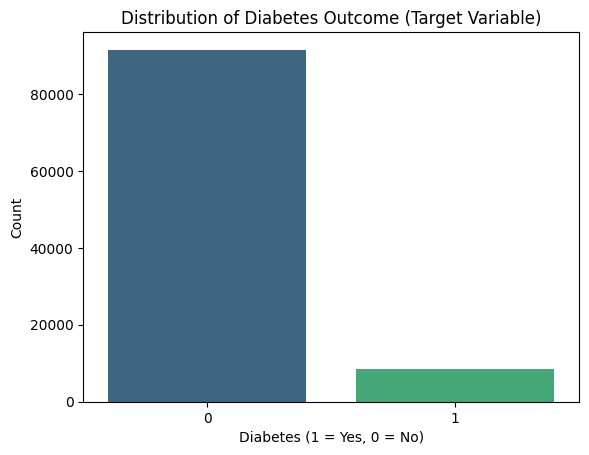

In [54]:

# Count of diabetic (1) vs non-diabetic (0)
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Distribution of Diabetes Outcome (Target Variable)')
plt.xlabel('Diabetes (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

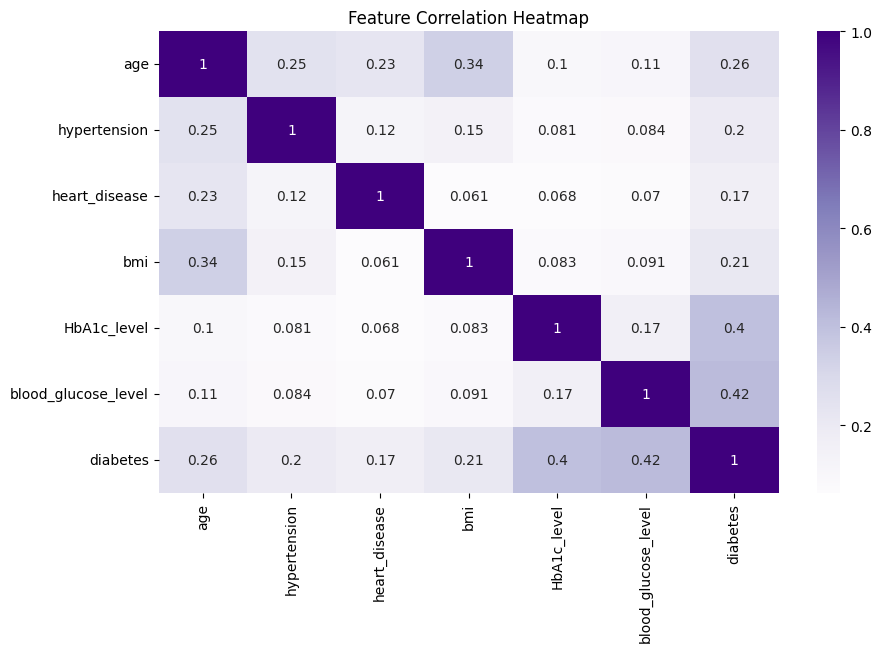

In [55]:
# Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Purples')
plt.title("Feature Correlation Heatmap")
plt.show()

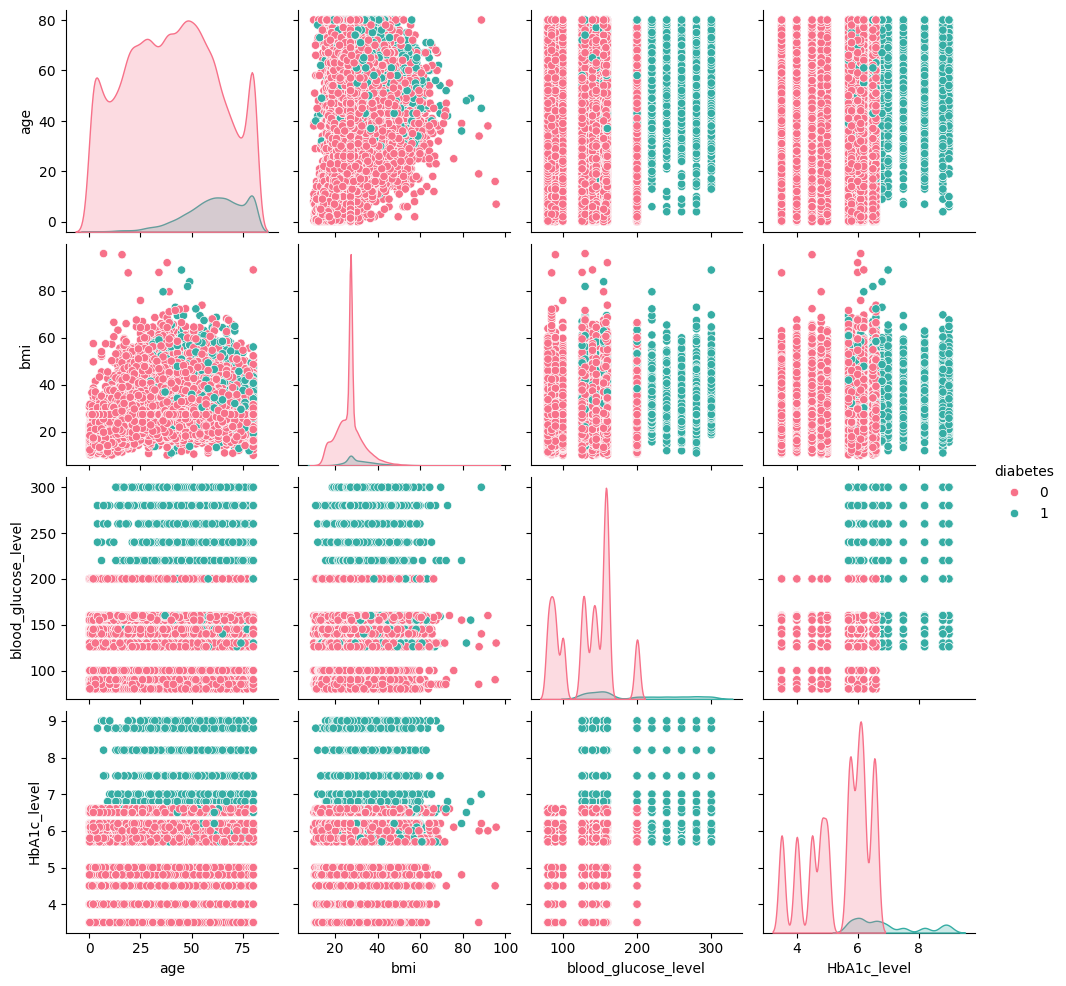

In [56]:
# Pairplot for first few numeric features
sns.pairplot(df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'diabetes']], hue='diabetes', palette='husl')
plt.show()

In [57]:
#  (Enhanced) - Data Preprocessing
# =======================================
#  Handle missing values
# =======================================
print("Before cleaning, missing values:")
print(df.isna().sum())

Before cleaning, missing values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [58]:
# Replace missing BMI values with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [59]:
# Check duplicates
duplicate_count = df.duplicated().sum()
print(f"\n🔹 Duplicate Rows: {duplicate_count}")


🔹 Duplicate Rows: 3854


In [63]:
# =======================================
#  Encode categorical variables
# =======================================
from sklearn.preprocessing import LabelEncoder

df_prep = df.copy()
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("🔹 Categorical Columns:", list(cat_cols))

# Label Encoding (since few categories)
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("✅ All categorical columns encoded successfully.")
display(df.head())


🔹 Categorical Columns: ['gender', 'smoking_history']
✅ All categorical columns encoded successfully.


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [66]:
from google.colab import drive
import os
import joblib

# Mount Google Drive
drive.mount('/content/drive')

# Define save directory
drive_output_dir = '/content/drive/MyDrive/DiabetesPrediction/outputs'
os.makedirs(drive_output_dir, exist_ok=True)

# ✅ Save the entire label encoder dictionary
joblib.dump(label_encoders, os.path.join(drive_output_dir, 'label_encoders.pkl'))

print("✅ All label encoders saved successfully to Google Drive!")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ All label encoders saved successfully to Google Drive!


In [71]:
# -------------------------------
# Handle outliers
# -------------------------------
for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    df[col] = np.clip(df[col], df[col].quantile(0.01), df[col].quantile(0.99))

In [73]:
# Features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

print("X shape:", X.shape)  # (100000, 12) after encoding
print("y shape:", y.shape)
print("Target distribution:\n", y.value_counts(normalize=True))  # ~0.65 non-diabetic, ~0.35 diabetic


X shape: (96146, 8)
y shape: (96146,)
Target distribution:
 diabetes
0    0.91178
1    0.08822
Name: proportion, dtype: float64


In [74]:
# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Standardize numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("✅ Feature scaling complete.")


✅ Feature scaling complete.


In [75]:
# Save the scaler
joblib.dump(scaler, os.path.join(drive_output_dir, "scaler.pkl"))

['/content/drive/MyDrive/DiabetesPrediction/outputs/scaler.pkl']

In [ ]:
# =======================================
# Train–Test Split
# =======================================
X = df_prep.drop('diabetes', axis=1)
y = df_prep['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# =======================================
# Feature Scaling
# =======================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Class balance before SMOTE: Counter({0: 69438, 1: 5439})


/tmp/ipython-input-4078916628.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='pastel')


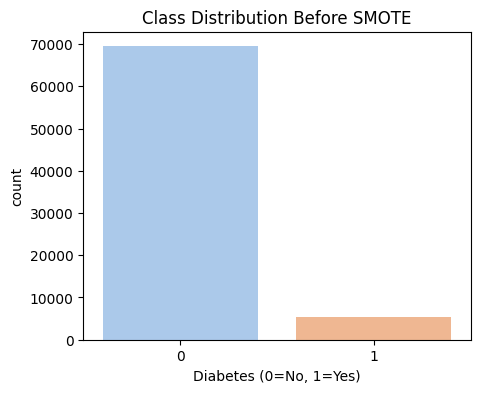

Class balance after SMOTE: Counter({0: 69438, 1: 69438})


/tmp/ipython-input-4078916628.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_bal, palette='muted')


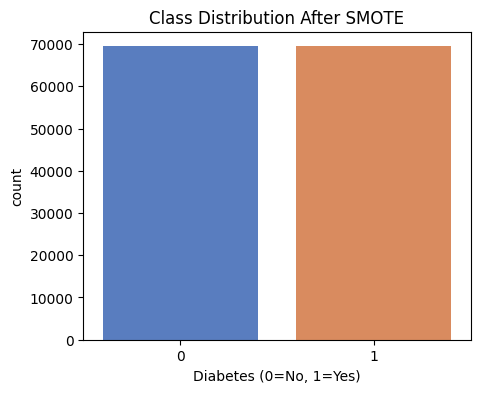

In [ ]:
# =======================================
#  Class Balancing using SMOTE
# =======================================
print("\nClass balance before SMOTE:", Counter(y_train))
plt.figure(figsize=(5,4))
sns.countplot(x=y_train, palette='pastel')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.show()

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Class balance after SMOTE:", Counter(y_train_bal))
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_bal, palette='muted')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Diabetes (0=No, 1=Yes)")
plt.show()


In [ ]:
# =======================================
# Final Info
# =======================================
print("\nFinal Dataset Shapes:")
print("X_train_bal:", X_train_bal.shape)
print("y_train_bal:", y_train_bal.shape)
print("X_test:", X_test_scaled.shape)
print("y_test:", y_test.shape)


Final Dataset Shapes:
X_train_bal: (138876, 6)
y_train_bal: (138876,)
X_test: (18720, 6)
y_test: (18720,)


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os

# Create a folder inside Google Drive for your project
save_path = "/content/drive/MyDrive/Diabetes_MLP_Project/processed_data"
os.makedirs(save_path, exist_ok=True)

print("Data will be saved to:", save_path)


Data will be saved to: /content/drive/MyDrive/Diabetes_MLP_Project/processed_data


In [ ]:
import joblib

In [ ]:
# Convert arrays to DataFrames for saving
X_train_bal_df = pd.DataFrame(X_train_bal, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

train_bal_df = X_train_bal_df.copy()
train_bal_df["diabetes"] = y_train_bal.values

test_df = X_test_scaled_df.copy()
test_df["diabetes"] = y_test.values

# Save as CSV in Drive folder
train_csv_path = f"{save_path}/train_balanced.csv"
test_csv_path = f"{save_path}/test_scaled.csv"
train_bal_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

# Save compressed NumPy arrays
npz_path = f"{save_path}/diabetes_preprocessed.npz"
np.savez_compressed(npz_path,
                    X_train_bal=X_train_bal, y_train_bal=y_train_bal,
                    X_test_scaled=X_test_scaled, y_test=y_test)

# Save scaler
scaler_path = f"{save_path}/scaler_diabetes.save"
joblib.dump(scaler, scaler_path)

print("✅ Files saved to Google Drive:")
print(" -", train_csv_path)
print(" -", test_csv_path)
print(" -", npz_path)
print(" -", scaler_path)

✅ Files saved to Google Drive:
 - /content/drive/MyDrive/Diabetes_MLP_Project/processed_data/train_balanced.csv
 - /content/drive/MyDrive/Diabetes_MLP_Project/processed_data/test_scaled.csv
 - /content/drive/MyDrive/Diabetes_MLP_Project/processed_data/diabetes_preprocessed.npz
 - /content/drive/MyDrive/Diabetes_MLP_Project/processed_data/scaler_diabetes.save
